In [1]:
#Cargar datos 
import pandas as pd
df = pd.read_json("C:/Users/Andre/Documents/laboratorio/Proyectos/sistemaRecomendacion/data/All_Beauty_5.json",lines=True)

In [2]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"09 1, 2016",A3CIUOJXQ5VDQ2,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Shelly F,As advertised. Reasonably priced,Five Stars,1472688000,NaN,NaN
1,5,True,"11 14, 2013",A3H7T87S984REU,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",houserules18,Like the oder and the feel when I put it on my...,Good for the face,1384387200,NaN,NaN
2,1,True,"08 18, 2013",A3J034YH7UG4KT,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Adam,I bought this to smell nice after I shave. Wh...,Smells awful,1376784000,NaN,NaN
3,5,False,"05 3, 2011",A2UEO5XR3598GI,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Rich K,HEY!! I am an Aqua Velva Man and absolutely lo...,Truth is There IS Nothing Like an AQUA VELVA MAN.,1304380800,25,NaN
4,5,True,"05 6, 2011",A3SFRT223XXWF7,B00006L9LC,{'Size:': ' 200ml/6.7oz'},C. C. Christian,If you ever want to feel pampered by a shampoo...,Bvlgari Shampoo,1304640000,3,NaN


In [3]:
df.describe()

,overall,unixReviewTime
count,5269.000000,5.269000e+03
mean,4.771873,1.441506e+09
std,0.743204,5.473127e+07
min,1.000000,1.095725e+09
25%,5.000000,1.407024e+09
50%,5.000000,1.445645e+09
75%,5.000000,1.481674e+09
max,5.000000,1.534982e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5269 entries, 0 to 5268
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         5269 non-null   int64 
 1   verified        5269 non-null   bool  
 2   reviewTime      5269 non-null   object
 3   reviewerID      5269 non-null   object
 4   asin            5269 non-null   object
 5   style           4624 non-null   object
 6   reviewerName    5269 non-null   object
 7   reviewText      5264 non-null   object
 8   summary         5264 non-null   object
 9   unixReviewTime  5269 non-null   int64 
 10  vote            552 non-null    object
 11  image           98 non-null     object
dtypes: bool(1), int64(2), object(9)
memory usage: 458.1+ KB


In [5]:
df.isnull().sum()

overall              0
verified             0
reviewTime           0
reviewerID           0
asin                 0
style              645
reviewerName         0
reviewText           5
summary              5
unixReviewTime       0
vote              4717
image             5171
dtype: int64

In [6]:

#Delete all columns with 50% of missing data : 
#Eliminar columnas que tenga mas de del 50% con missing data : 

#paso 1 : 
"""
Columns with missing values : 

-vote:  numeric (int)
-image : url
    """

'\nColumns with missing values : \n\n-vote:  numeric (int)\n-image : url\n    '

In [7]:
#paso 2 : Calcular el porcentaje de missing data :
#calculate percentage of missing data :
porcentaje_nulos= df.isnull().sum()/len(df)*100; 
print("porcentaje_nulos:" )
print(porcentaje_nulos)

porcentaje_nulos:
overall            0.000000
verified           0.000000
reviewTime         0.000000
reviewerID         0.000000
asin               0.000000
style             12.241412
reviewerName       0.000000
reviewText         0.094895
summary            0.094895
unixReviewTime     0.000000
vote              89.523629
image             98.140065
dtype: float64


In [8]:
#Paso 3: Definir el umbral de eliminacion : 
umbral = 50; 
columnas_a_eliminar=porcentaje_nulos[porcentaje_nulos>umbral].index
print("columnas_a_eliminar:",columnas_a_eliminar)

columnas_a_eliminar: Index(['vote', 'image'], dtype='object')


In [9]:
#paso 4: eliminar columnas :
df=df.drop(columns=columnas_a_eliminar)

In [10]:
#paso 5: Verificar el dataset actualizado: 
print(df)

      overall  verified   reviewTime      reviewerID        asin  \
0           5      True   09 1, 2016  A3CIUOJXQ5VDQ2  B0000530HU   
1           5      True  11 14, 2013  A3H7T87S984REU  B0000530HU   
2           1      True  08 18, 2013  A3J034YH7UG4KT  B0000530HU   
3           5     False   05 3, 2011  A2UEO5XR3598GI  B0000530HU   
4           5      True   05 6, 2011  A3SFRT223XXWF7  B00006L9LC   
...       ...       ...          ...             ...         ...   
5264        5      True  08 23, 2018   AUX122XW8ONG6  B01DLR9IDI   
5265        5      True  08 23, 2018   AUX122XW8ONG6  B01DLR9IDI   
5266        5      True  08 23, 2018   AUX122XW8ONG6  B01DLR9IDI   
5267        5      True  08 23, 2018   AUX122XW8ONG6  B01DLR9IDI   
5268        5      True  08 23, 2018   AUX122XW8ONG6  B01DLR9IDI   

                                                  style     reviewerName  \
0     {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...         Shelly F   
1     {'Size:': ' 7.0 oz', 'Fla

In [11]:
#EDA 
import matplotlib.pyplot as plt 

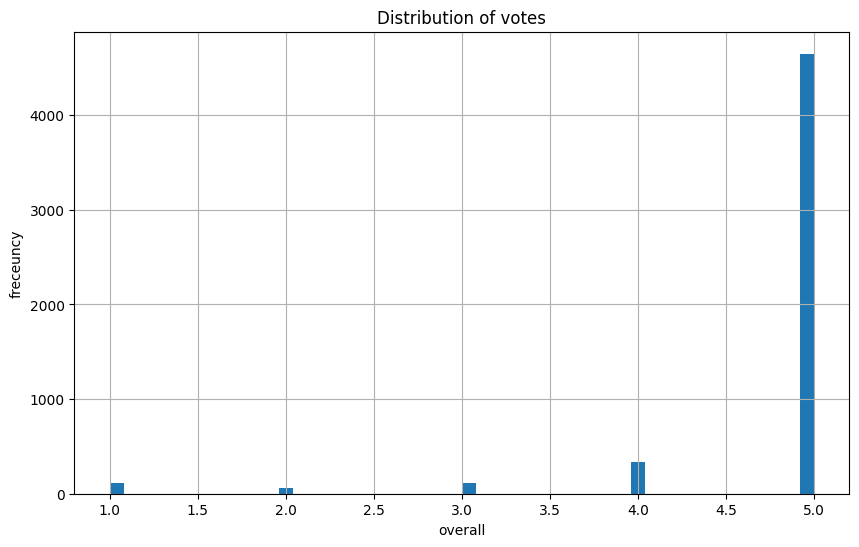

In [12]:
df['overall'].hist(bins=50, figsize=(10,6))
plt.title('Distribution of votes')
plt.xlabel('overall')
plt.ylabel('freceuncy')
plt.show()

In [13]:
#Imputation of string values : 

#mode  :

moda=df['summary'].mode()[0]
df['summary']=df['summary'].fillna(moda)

In [14]:
porcentaje_nulos2=df.isnull().sum()/len(df)*100;
print("porcentaje_nulos2:", porcentaje_nulos2)

porcentaje_nulos2: overall            0.000000
verified           0.000000
reviewTime         0.000000
reviewerID         0.000000
asin               0.000000
style             12.241412
reviewerName       0.000000
reviewText         0.094895
summary            0.000000
unixReviewTime     0.000000
dtype: float64


In [15]:
#Embeddings for eliminate missing data from reviewText column : 
!pip install sentence-transformers scikit-learn  


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from sentence_transformers import SentenceTransformer

c:\Users\Andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
#cargar el modelo de embeddings : 
model=SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')


In [18]:
#Generar embeddings para las reviews no nulas :
reviews_validas= df["reviewText"].dropna().tolist()
embeddings=model.encode(reviews_validas)

In [19]:
#Crear un contexto para filas  con valores faltantes 

#Crear una columna contexto 
df["contexto"]=df.apply(lambda row: f"summary: {row['summary']}",axis=1)

In [20]:
#generar embeddings para el contexto :
embeddings_contexto=model.encode(df["contexto"].tolist())

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

#indices de filas con valores faltantes:
indices_faltantes=df[df["reviewText"].isnull()].index.tolist()

for idx in indices_faltantes:
    #obtener el embedding del contexto de la fila faltante: 
    embedding_fila=embeddings_contexto[idx].reshape(1,-1)
    #calcular similitud con todas las reviews validas: 
    similitudes=cosine_similarity(embedding_fila,embeddings)
    #Encontrar la review  mas similar 
    indice_mas_similar=np.argmax(similitudes)
    review_imputada=reviews_validas[indice_mas_similar]
    #Asignar la review al dataset 
    df.at[idx,"reviewText"]=review_imputada
    

In [22]:
#Verificar que no hayan valores faltantes :
print(df.isnull().sum())

overall             0
verified            0
reviewTime          0
reviewerID          0
asin                0
style             645
reviewerName        0
reviewText          0
summary             0
unixReviewTime      0
contexto            0
dtype: int64
